# Q1 Pre-Processing Youbike data

In [1]:
# Getting youtube data
import requests
import json
response = requests.get('https://tcgbusfs.blob.core.windows.net/blobyoubike/YouBikeTP.gz')
data = json.loads(response.text)

## Q1_Code: Using site name as dict id 

1. 原本的Youbike data除了第一層有`retCode`和`retVal`外，在`retVal`所對應到的資料中，是以`sno`也就是駐車站編號作為dict的key。我希望把整筆資料轉個型態，仍保持dict of dict，但最外層的dictionary裡面的每個key是站台「中文名稱」，並以`site_dict`來作為新的dictionary的變數名稱。

2. 除此之外，請參考下列資料，嘗試移除幾個儲存英文站名、英文區域和英文地址的keys與values，有`['sareaen', 'snaen', 'aren']`。參考資料：[Removing multiple keys from a dictionary safely (stackoverflow)](https://stackoverflow.com/questions/8995611/removing-multiple-keys-from-a-dictionary-safely)

In [3]:
site_dict = {}  # Using this as new dict name
en_keys = ['sareaen', 'snaen', 'aren']

# Your code should go here







## Q1_Verification: Print out the key of the outermost dictionary

執行以下程式碼以驗證你的程式撰寫是否成功。你不能更動以下Cell的Code，僅能在上面的Cell撰寫程式，使得以下的Code列印出來的資料與預期相同。助教會看這個Cell的結果來判斷你是否達到題目要求。

預期結果如下：
`['捷運市政府站(3號出口)', '捷運國父紀念館站(2號出口)', '台北市政府', '市民廣場', '興雅國中', '臺北南山廣場', '信義廣場(台北101)', '世貿三館', '松德站', '台北市災害應變中心']
`

In [4]:
print(list(site_dict.keys())[:10])

['捷運市政府站(3號出口)', '捷運國父紀念館站(2號出口)', '台北市政府', '市民廣場', '興雅國中', '臺北南山廣場', '信義廣場(台北101)', '世貿三館', '松德站', '台北市災害應變中心']


## Q1_Verification: Print out keys of site's data

執行以下程式碼以驗證你的程式撰寫是否成功。你不能更動以下Cell的Code，僅能在上面的Cell撰寫程式，使得以下的Code列印出來的資料與預期相同。預期結果如下：`dict_keys(['sno', 'sna', 'tot', 'sbi', 'sarea', 'mday', 'lat', 'lng', 'ar', 'bemp', 'act'])
`

In [5]:
site_dict['捷運市政府站(3號出口)'].keys()

dict_keys(['sno', 'sna', 'tot', 'sbi', 'sarea', 'mday', 'lat', 'lng', 'ar', 'bemp', 'act'])

# Q2 Calculating the fullness of each youbike site


## Q2_1 : Inserting a new indicator fullness for each site

建立一個新的指標`perc = sbi/tot`，為現有單車數(`sbi`)除以總單車格數（`tot`）作為滿站的比例，並希望在每個駐車站的資料中多一個key為`perc`來存放滿站比例。你可以接續上題作，或者回到原本撈回來的資料做。

例如
```
{ '捷運市政府站(3號出口)':{
    'sna': '捷運市政府站(3號出口)', 
    'sno': ...,
    'tot': ...,
    'sbi': ..., 
    'perc': ...,
    ...},
    ...
}
```

In [7]:
# Your code should be here




## Q2_1: Verification
* 列印出任意10個站台的perc。必須同時列印出每個站台的sna, sbi, tot, perc
* 請盡可能地印出類似下面的格式，以了解如何使用`.format()`或`%d`等來控制列印輸出格式。

In [24]:
# Your code should be here




捷運市政府站(3號出口)   	180	 10	0.06
捷運國父紀念館站(2號出口) 	 48	 13	0.27
台北市政府          	 40	  8	0.20
市民廣場           	 60	  5	0.08
興雅國中           	 60	 28	0.47
臺北南山廣場         	 80	  0	0.00
信義廣場(台北101)    	 80	  0	0.00
世貿三館           	 60	  1	0.02
松德站            	 40	  2	0.05
台北市災害應變中心      	 54	 50	0.93


## Q2_2 (Code + Output verification): 列印出`perc`(fullness)最高的站

用`for-loop`和`if-else`找出`perc`(fullness)最高的駐車站，並印出其站名和`perc`數值，以及時間。<br>

註：本題不可使用內建或者第三方的sorting函式。

In [25]:
fullest_sna = ""
fullest_perc = 0.0
fullest_time = ""

# Your code should be here








print("At %s, the highest perc is %f (Station: %s)"%(fullest_time, fullest_perc, fullest_sna))

At 20211014204443, the highest perc is 0.937500 (Station: 士林運動中心)


## Q2_3 (Code + Output verification 2): Top 10

用內建或第三方的sorting函式，將`perc`(fullness)按照full to empty排序，用for-loop列印出，`perc`最高的10個駐車站的`sna`、`perc`、`tot`、`sbi`(（請善用printing formation和`\t`將之對齊排列好，但不用照高低順序）。

In [29]:

# Your code should be here



    

台北市災害應變中心      	 54	 50	0.93
三民公園           	 30	 28	0.93
士林運動中心         	 32	 30	0.94
興安華城           	 60	 50	0.83
蘭雅國小           	 30	 25	0.83
錦德公園           	 34	 31	0.91
螢橋國小           	 40	 35	0.88
春光公園           	 38	 31	0.82
塔悠疏散門          	 30	 26	0.87


# Q3: Categorizing fullness

當要建立回歸模型來預測腳踏車的滿站程度時，我們需要的可能是上述的`perc`來作為依變項Y；但我如果只是要仿照Youbike地圖，用顏色來標示出滿站程度時（如https://taipei.youbike.com.tw/station/map） ，就需要將`perc`按數值分區。

## Q3_2 (Code and Output Verification)

設計if-else搭配for-loop來計算每個資料區間各有多少個腳踏車站台。一共分成以下幾個label。
- full: perc = 1.0，
- empty: perc = 0.0, 
- few: 0.0 < perc <0.3
- general: 0.3 <= perc < 0.7
- many: 0.7 <=  perc < 1.0
請在每個站台的dictionary中新增一個key為label，然後用Counting來累計並**列印出**當時刻full, empty, few, general, many各有多少個站台。

範例輸出（可能因為不同時間而數量不同）
```
few 173
general 152
empty 44
many 30
```

In [34]:
# Your code should be here













few 173
general 152
empty 44
many 30


# Q4_e 自然常數的泰勒展式
* e ≈ 2.71828 18284 59045 23536
* 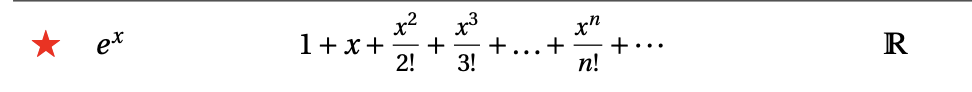

In [35]:
e = 1
for i in range(1, 1000):
    # Your code should be here
    
    
    
    
    
print(e)
        

2.7182818284590455
